# STAT 207 Group Lab Assignment 8 - [10 total points]

## Inference for Difference Parameters

Due: Wednesday, March 29, 11:59pm CST

No Late Submissions Accepted

<hr>


## <u>Purpose</u>:
You should work in groups of 2-3 on this report. The purpose of this group lab assignment is to perform inference for parameters from two groups, often called difference parameters.  You will additionally explore properties of *p*-values and significance levels.
<hr>

## <u>Assignment Instructions</u>:


### Contribution Report
These contribution reports should be included in all group lab assignments. In this contribution report below you should list of the following:
1. The netID for the lab submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the lab.)
2. Names and netIDs of each team member.
3. Contributions of each team member to report.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this lab assignment*, 

OR

*doe105 should be graded*

*1. John Smith (smith92): did number 1,2 and 3*

*2. Jane Doe (doe105): did number 4, and 5*

Damian Makowski (damianm4) should be graded.
1. Yuanbo Shen(yuanbo3)
2. Advait Renduchintala (advaitr3)
3. Damian Makowski (damianm4)

### Group Roles

You are expected to work in groups of 2-3 on this report.  Since you are working in groups, you may find it helpful to have specified roles.  Below, I provide roles that can be used for groups of 2 and for groups of 3.  I encourage you to switch roles within this lab report, as possible.  I also encourage you to switch roles for each subsequent lab, as possible, based on your group membership.  You may have established a different process for completing labs in the first few labs, and you can continue to use this process if you've found it to be effective.

#### Groups of 2

* **Driver**: This student will type the report.  While typing the report, you may be the one who is selecting the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  Specific ways to help may include: outlining the general steps needed to solve a question (providing the overview), locating examples within the course notes, and reviewing each line of code as it is typed.

#### Groups of 3

* **Driver**: This student will type the report.  They may also be the one to select the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  They may select the general approach to answering the question and/or a few steps to be completed along the way. 
* **Communicator**: This student will review the report (as it is typed) to ensure that it is clear and concise.  This student may also locate relevant examples within the course notes that may help complete the assignment.

<hr>

### Imports

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from scipy.stats import norm
sns.set()

<hr>

## Downloading Python Packages for the Rest of the Semester

Starting with Homework 9, you will need access to some additional packages in Python.  Take a moment to install those packages now.

To install these packages, you should open up your command line interface.  You can then type in the following two lines of code:

`conda install -c conda-forge statsmodels`

`conda install scikit-learn`

Once you have installed these two packages, you should not need any additional packages for the remainder of the semester.

You may delete the cell below this one once you have installed these packages.

<hr>

## <u>Case Study 1</u>: Buying Girl Scout Cookies

The underlying assumption of the hypothesis testing framework is that the null hypothesis is true.  This premise serves as the primary support for hypothesis testing being successful.  We'll explore this idea for this Case Study.

Suppose that the proportion of all undergraduate students who will buy Girl Scout Cookies this year is 0.375 (3/8).  Suppose that the proportion of all graduate students who will buy Girl Scout Cookies this year is also 0.375 (3/8).  Typically, we wouldn't know this value and would instead rely on our sample to perform inference.  For the sake of this exercise, we will be omniscient (all-knowing).  

We will generate sample data from this information.  Based on sample data, we'd like to assess if the population proportions for all undergraduate students and all graduate students who will buy Girl Scout Cookies this year is equal.

In other words, we'll explore the hypotheses:

$H_0: p_1 = p_2$ vs. $H_a: p_1 \neq p_2$

### 1. [1 pt] Specify a Distribution

Imagine that we take a random sample of 80 undergraduate students and a second random sample of 45 graduate students.  For each of these samples, we first count the number of students who bought Girl Scout Cookies this year (and are considered a successful trial), $X_1$ (the number of undergraduate students from a random sample who bought Girl Scout Cookies) and $X_2$ (the number of graduate students  from a random sample who bought girl scout cookies).  The random variables $X_1$ and $X_2$ follow specific theoretical distributions.  **Completely** specify these distributions.

$X_1$ ~ $Bin(80, 0.375)$

$X_2$ ~ $Bin(45, 0.375)$

### 2. [2 pts] Single Sample

Using the distribution from part 2, generate a random sample of 80 undergraduate students and a second random sample of 45 graduate students.  Specify a random state of 80 and 45 for these two samples, respectively.

**a)** Using this sample information, calculate the sample proportions of students who order Girl Scout Cookies for each of the two groups.

In [5]:
from scipy.stats import binom
x_1 = binom.rvs(80, 0.375, random_state = 80)
x_2 =binom.rvs(45, 0.375, random_state = 45)
print(x_1, x_2)

p_1 = x_1 / 80
p_2 = x_2 / 45
print(p_1, p_2)

30 24
0.375 0.5333333333333333


**b)** Using this sample information, calculate the estimated common sample proportion under the null hypothesis.

In [6]:
p_common = (x_1 + x_2) / (80 + 45)
p_common

0.432

**c)** Calculate the test statistic for your simulated samples.

In [7]:
test_statistics = (p_1 - p_2) / np.sqrt(p_common * (1 - p_common) * (1/80 + 1/45))
test_statistics

-1.7153492521523646

**d)** Calculate the *p*-value for your sample data.

In [8]:
p_value = 2 * (1 - norm.cdf(abs(test_statistics)))
p_value

0.08628121363245422

### 3. [2 pts] Sampling Distribution

**a)** Now, instead of just a single sample, we want to understand the value of all possible test statistics.  Repeat the calculation from Question 2 1000 times, recording the value of the test statistic and the *p*-value for each set of random samples.  

**Note: For this question, you do not need to record the sample proportions or the common sample proportion in your output.**

In [23]:
data = []
for i in range(10000):
    x_1 = binom.rvs(80, 0.375)
    x_2 =binom.rvs(45, 0.375)
    p_1 = x_1 / 80
    p_2 = x_2 / 45
    p_common = (x_1 + x_2) / (80 + 45)
    test_statistics = (p_1 - p_2) / np.sqrt(p_common * (1 - p_common) * (1/80 + 1/45))
    p_value = 2 * (1 - norm.cdf(abs(test_statistics)))
    d = {'test_statistics' : test_statistics, 'p_value': p_value}
    data.append(d)
df_simulation = pd.DataFrame(data)

In [24]:
df_simulation

,test_statistics,p_value
0,-1.240008,0.214972
1,-0.275855,0.782660
2,-0.689466,0.490530
3,-0.095256,0.924111
4,0.301645,0.762923
...,...,...
9995,-0.310565,0.756131
9996,-0.596233,0.551019
9997,1.630466,0.103003
9998,-0.788294,0.430525


**b)** Using the data generated in Question 3a, generate a histogram for the simulated test statistics.

<AxesSubplot: >

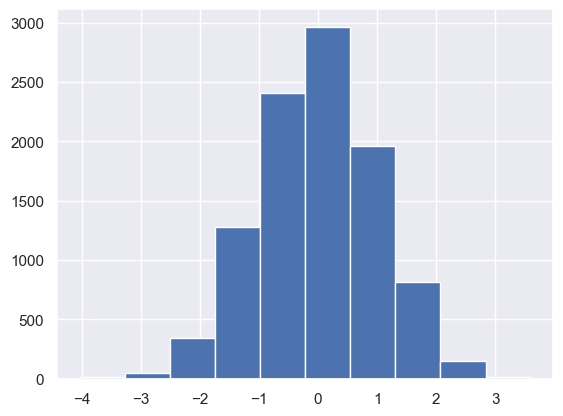

In [25]:
df_simulation['test_statistics'].hist()

**c)** Using the data generated in Question 3a, generate a histogram for the simulated *p*-values.

<AxesSubplot: >

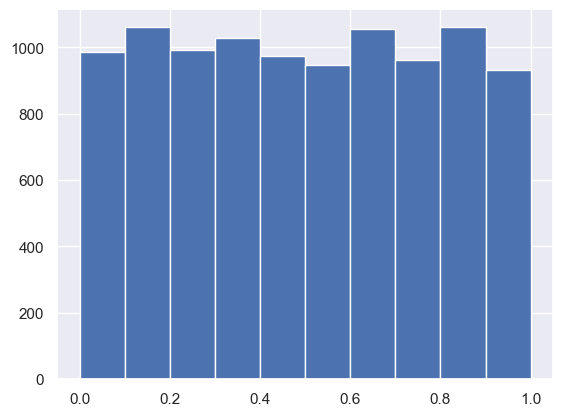

In [26]:
df_simulation.p_value.hist()

**d)** Describe the shape of the distribution for the simulated test statistics and of the distribution for the simulated *p*-values.

The shape of distribution of test statistics is close to normal.

The shape of distribution of p_values is close to uniform.

### 4. [1 pt] Significance Level

Our significance level is the proportion of times that we would reject the null hypothesis if the null hypothesis is really true.  In other words, it's the probability of making a specific kind of mistake when performing a hypothesis test.

We have assumed the null hypothesis is true when generating our random samples, so we have met that condition from our definition of the significance level.

We'll consider two different significance levels: $\alpha = 0.2$ and $\alpha = 0.05$.

Using the simulated p-values from Question 3, what proportion of the time would we decide to reject the null hypothesis at a significance level of 0.2?  What about for a significance level of 0.05?

In [27]:
(df_simulation.p_value <= 0.2).mean()

0.2048

In [28]:
(df_simulation.p_value <= 0.05).mean()

0.0497

Because the hypothesis is true, we find that about 20% of our samples will have p-value less than or equal to 0.2 and about 5% of our sample will have a p-value less than or equal to 0.05. This is expected based on the definition of significance level.

<hr>

## <u>Case Study 2</u>: Revisiting Groundhog Day

Recall that we previously explored the results of Groundhog Day, where tradition claims that weather in February and March is influenced by whether a groundhog named Phil sees his shadow in Pennsylvania.  In Homework 4, we explored how the temperatures in the Midwest varied based on whether Phil saw his shadow descriptively.  Now, we'll consider what we can say about the behavior of possible average temperatures using the principles of statistical inference.

Specifically, we'll use the variables Phil, which records the results of Phil's experiment, and February Average Temperature to assess if there is evidence that supports that Phil's results are accurate as measured by February Average Temperatures.

### 5. [2.5 pts] Simulated Sampling Distributions

Rather than rely on traditional hypothesis testing approaches (where the distributional assumptions may not be met), we'll rely on simulations through a resampling approach in order to generate a sampling distribution for our test statistic if the null hypothesis of no difference between the population parameters is correct, or if the tradition is correct (that the mean of the average February temperature when Phil sees his shadow (full shadow) is less than the mean of the average February temperature when Phil doesn't see his shadow (no shadow)). 

**a)** First, read in the cleaned version of the groundhog data.

In [29]:
df = pd.read_csv("groundhog_cleaned.csv")
df.shape

(115, 10)

In [30]:
df.head()

,Year,Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
1,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
2,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
3,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
4,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0


**b)** We'll use simulation to perform a resampling approach to hypothesis testing.  In essence, we will reshuffle whether Phil saw his shadow or not for each year.

To do this, 
- Sample the results of Phil's experiment without replacement.  Use a sample size equal to the full sample size.  Be sure to ignore the original indices.  
- Create a new data frame that combines your reshuffled results of Phil with the original temperatures (in their original order).
- Calculate the difference in the means of the average February temperatures (full shadow minus no shadow).  Record this value.
- Repeat this process 300 times.

In [135]:
# Do it once
shuffled_sample = df.Phil.sample(115, replace = False, ignore_index=True) # 数据还是原来的，但是顺序打乱
feb_temp = df['February Average Temperature']
reshuffled_df = pd.DataFrame({"result":shuffled_sample, 'temp' : feb_temp}) # 重构
display(reshuffled_df.head())


print('Mean Difference:', reshuffled_df[reshuffled_df.result == 'Full Shadow'].temp.mean() - reshuffled_df[reshuffled_df.result == 'No Shadow'].temp.mean())


,result,temp
0,Full Shadow,35.37
1,Full Shadow,30.76
2,Full Shadow,29.86
3,Full Shadow,28.42
4,Full Shadow,31.59


Mean Difference: -0.047733333333333405


In [130]:
# Do it 300 times
data = []
for i in range(300):
    shuffled_sample = df.Phil.sample(115, replace = False, ignore_index=True)
    reshuffled_df = pd.DataFrame({"result":shuffled_sample, 'temp' : feb_temp})
    new_df_full = reshuffled_df[reshuffled_df.result == 'Full Shadow']
    new_df_no = reshuffled_df[reshuffled_df.result == 'No Shadow']
    mean_diff = new_df_full.temp.mean() - new_df_no.temp.mean()
    d = {'mean_diff':mean_diff}
    data.append(d)

diff_simulation = pd.DataFrame(data)

In [131]:
diff_simulation.head()

,mean_diff
0,-0.335233
1,0.064967
2,-0.980000
3,1.316167
4,-0.674867


### 6. [1.5 pts] Evaluating Your Sample

**a)** Calculate your observed sample statistic.  This would be the observed difference in the means of the average February temperatures (full shadow minus no shadow).

In [132]:
# Observed sample statistic，即原数据
obs_no_shadow = df[df.Phil == "No Shadow"]
obs_full_shadow = df[df.Phil == 'Full Shadow']
obs_diff = obs_full_shadow['February Average Temperature'].mean() - obs_no_shadow['February Average Temperature'].mean()
obs_diff

-1.8654999999999973

**b)** Using your simulated sampling distribution from Question 5b, determine how often you would get an observed statistic as extreme or more extreme than what we observed. 

In [133]:
(diff_simulation['mean_diff'] <= obs_diff).mean()

0.006666666666666667

**c)** What does this tell you about the original tradition of Groundhog Day?

Only in about 0.6% of reshuffled samples did I get the observed difference. This means that the event with very low probability occurs assuming our null hypothesis is true.

Therefore, it indicates that we have a strong evidence to reject the null hypothesis. |